<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-Dataset-Creation---Part-One" data-toc-modified-id="Image-Dataset-Creation---Part-One-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image Dataset Creation - Part One</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Aquire-the-Raw-Dataset-Images" data-toc-modified-id="Aquire-the-Raw-Dataset-Images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Aquire the Raw Dataset Images</a></span><ul class="toc-item"><li><span><a href="#Sort-the-Cat-and-Dog-Images" data-toc-modified-id="Sort-the-Cat-and-Dog-Images-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sort the Cat and Dog Images</a></span></li><li><span><a href="#Sort-the-Object-Images" data-toc-modified-id="Sort-the-Object-Images-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sort the Object Images</a></span></li></ul></li><li><span><a href="#Image-Dataset-Creation-Prototype" data-toc-modified-id="Image-Dataset-Creation-Prototype-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Image Dataset Creation Prototype</a></span><ul class="toc-item"><li><span><a href="#Load-libraries-and-initialize-variables" data-toc-modified-id="Load-libraries-and-initialize-variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load libraries and initialize variables</a></span></li><li><span><a href="#Create-a-function-to-display-a-collection-of-images-in-a-grid-for-use-later-on" data-toc-modified-id="Create-a-function-to-display-a-collection-of-images-in-a-grid-for-use-later-on-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create a function to display a collection of images in a grid for use later on</a></span></li><li><span><a href="#Gather-and-display-the-the-first-ten-cat-images" data-toc-modified-id="Gather-and-display-the-the-first-ten-cat-images-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Gather and display the the first ten cat images</a></span></li><li><span><a href="#Convert-images-to-squares-(i.e.-1:1-aspect-ratio)" data-toc-modified-id="Convert-images-to-squares-(i.e.-1:1-aspect-ratio)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Convert images to squares (i.e. 1:1 aspect ratio)</a></span></li><li><span><a href="#Reduce-the-size-of-the-images" data-toc-modified-id="Reduce-the-size-of-the-images-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Reduce the size of the images</a></span></li><li><span><a href="#Write-an-image-to-disc-and-compare-the-original-image-attributes-with-processed-image-attributes" data-toc-modified-id="Write-an-image-to-disc-and-compare-the-original-image-attributes-with-processed-image-attributes-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Write an image to disc and compare the original image attributes with processed image attributes</a></span></li><li><span><a href="#Examine-a-10x10-subsection-of-the-first-two-image's-color-channels" data-toc-modified-id="Examine-a-10x10-subsection-of-the-first-two-image's-color-channels-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Examine a 10x10 subsection of the first two image's color channels</a></span></li><li><span><a href="#Reshape/flatten-and-standardize-the-sample-images" data-toc-modified-id="Reshape/flatten-and-standardize-the-sample-images-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Reshape/flatten and standardize the sample images</a></span></li><li><span><a href="#Package-the-data-into-a-portable-container" data-toc-modified-id="Package-the-data-into-a-portable-container-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Package the data into a portable container</a></span><ul class="toc-item"><li><span><a href="#Create-the-HDF5-and-write-the-dataset-into-it" data-toc-modified-id="Create-the-HDF5-and-write-the-dataset-into-it-4.9.1"><span class="toc-item-num">4.9.1&nbsp;&nbsp;</span>Create the HDF5 and write the dataset into it</a></span></li><li><span><a href="#Validate-the-HDF5-container-is-readable-and-the-stored-dataset-has-been-saved-correctly" data-toc-modified-id="Validate-the-HDF5-container-is-readable-and-the-stored-dataset-has-been-saved-correctly-4.9.2"><span class="toc-item-num">4.9.2&nbsp;&nbsp;</span>Validate the HDF5 container is readable and the stored dataset has been saved correctly</a></span></li></ul></li></ul></li><li><span><a href="#Summary-and-Next-Steps" data-toc-modified-id="Summary-and-Next-Steps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary and Next Steps</a></span></li><li><span><a href="#Appendix-A:--Installing-openCV-for-Image-Processing" data-toc-modified-id="Appendix-A:--Installing-openCV-for-Image-Processing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendix A:  Installing openCV for Image Processing</a></span></li></ul></div>

<h1 style="text-align: center;">Image Dataset Creation - Part One</h1>

# Introduction

<img style="float: left; margin-right: 15px;" src="images/catMonocle.jpg">

For our next set of write-ups we'll examine building a set neural networks (NN) from scratch that classify images.  And what sort of images will we classify you might ask?

Well... How about cats vs. the world?!?! 

The idea for this is based on the Kaggle competition dogs vs. cats which you can read more about [here](https://www.kaggle.com/c/dogs-vs-cats).  For our purposes; however, I'd like to utilize a dataset that is a little less homogeneous and hence a little easier for the NN to classify.

However, *before* we start building NN we need a dataset of cat and non-cat images to feed the NN we build.

As such this write-up will focus on the work required to gather and process the cat and non-cat images we'll utilize in the next set of write-ups.  The steps to do this will be:
* Find and acquire the cat and non-cat images
* Process a small subset of images as a proof of concept for the image dataset creation process
* Output a portable binary data container containing the subset of processed images

# Aquire the Raw Dataset Images

The first task is to find and acquire a set of suitable cat and non-cat images that can be processed into a dataset for use in future NN classification write-ups.

After scouring the interwebs we've found two sets of images that should work:

__Cats Dataset Images__

The images for the cats portion of the dataset can be found here:  http://www.robots.ox.ac.uk/~vgg/data/pets/

This is a large collection of cat and dog images.  The file archive is around 733 MB, and it contains around 2,700 cat images.  It also contains a number of dog images.  While we don't need them for our upcoming NN write-ups, it might be good to save the dog images for something else later on.  Once the pet images archive and it's annotations are downloaded the following steps are taken:

```
mv annotations.tar.gz petAnnotations.tar.gz
tar -xvf petAnnotations.tar.gz
mv annotations/ petAnnotations/

mv images.tar.gz petImages.tar.gz
```

__Non-cats Dataset Images__


The images for the non-cats portion of the dataset can be found here:  http://www.vision.caltech.edu/Image_Datasets/Caltech101/

This is a large collection of different objects.  The file archive is around 131 MB, and it contains around 9,000 images.  Once the object images archive is downloaded the following steps are taken:

```
tar -xvf 101_ObjectCategories.tar.gz
```

Overall the images in this library are OK, but I'd rather get a better set at some point....

## Sort the Cat and Dog Images

Because the cat images are mixed in with dog images we need to do some sorting before moving on to the prototyping step.  If we examine the file "petAnnotations\list.txt" we see the following note: 

```
# Images with a capital first letter are cat images
# Images with small first letter are dog images
```

Based on that information we can write some python to extract and sort the pet images into cat and dog directories:

```python

######
# Note that this is currently a Markdown cell.  If you want to run the code in this cell from within the notebook
# change it to a Code cell first, and then execute it.
#####

# Imports
import os, sys, tarfile

# Init vars
dogCount = 0
catCount = 0

imageArchive = "petImages.tar.gz"
imagePath = "petImages"
catDir = "cats"
dogDir = "dogs"

# Extract the pet images from the archive
tar = tarfile.open(os.path.join(os.getcwd(), imageArchive), 'r:gz')
tar.extractall()
tar.close()

# Create the directories to hold the sorted images
os.rename(os.path.join(os.getcwd(), "images"), os.path.join(os.getcwd(), imagePath))
os.makedirs(os.path.join(os.getcwd(), imagePath, catDir), exist_ok=True)
os.makedirs(os.path.join(os.getcwd(), imagePath, dogDir), exist_ok=True)

# Sort the images
for (dirpath, dirnames, filenames) in os.walk(os.path.join(os.getcwd(), imagePath)):
	# Iterate through the cat and dog images
	for file in filenames:

		fromPath = os.path.join(os.getcwd(), imagePath, file)
		
		# Ignore any files without a "JPG" extension
		if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
			continue
		
		# Look at first letter in file name; upper == cat && lower == dog
		if file[0].isupper():
			toPath = os.path.join(os.getcwd(), imagePath, catDir, file)
			catCount += 1
		else:
			toPath = os.path.join(os.getcwd(), imagePath, dogDir, file)
			dogCount += 1
		
		# Move the image to the correct folder
		os.rename(fromPath, toPath)
		
	# Stop processing, so we don't recurse into the sorted image directories	
	break
	
# We're done; provide some simple metrics
print("\nDone!\n")
print("Total files sorted:" + str(dogCount + catCount))
print("Total cats:" + str(catCount)) 			
print("Total dogs:" + str(dogCount))
print("\n")
```


## Sort the Object Images

We need to take each of the object images out of their individual category folders, and move them into a central repository.  We really don't care what they are other than cat or non-cat.  Once moved we can process them.

```python

######
# Note that this is currently a Markdown cell.  If you want to run the code in this cell from within the notebook
# change it to a Code cell first, and then execute it.
#####

# Imports
import os, sys, tarfile, glob, shutil
from pathlib import Path

# Init vars and create directories
objectCount = 0

imageArchive = "101_ObjectCategories.tar.gz"
archiveDir = "101_ObjectCategories"
imageDir = "objectImages"

archiveDirPath = os.path.join(os.getcwd(), archiveDir)
archiveImages = os.path.join(archiveDirPath, '**', '*.jpg')

os.makedirs(os.path.join(os.getcwd(), imageDir), exist_ok=True)
imageDirPath = os.path.join(os.getcwd(), imageDir)

# Define list of object images to skip
skip = ['BACKGROUND_Google', 'cougar_body', 'cougar_face', 'dalmatian', 'garfield', 'snoopy']

# Extract the object images from the archive
tar = tarfile.open(os.path.join(os.getcwd(), imageArchive), 'r:gz')
tar.extractall()
tar.close()

# Move the image files from sub folders into a main area for later processing
for filename in glob.iglob(archiveImages, recursive=True):
    if Path(filename).parts[-2] in skip:
        continue
    newName = os.path.join(imageDirPath, Path(filename).parts[-2] + "-" + Path(filename).name)
    os.rename(filename, newName)
    objectCount += 1

shutil.rmtree(archiveDirPath)

# We're done; provide some simple metrics
print("\nDone!\n")
print("Total files moved:" + str(objectCount))
print("\n")
```

# Image Dataset Creation Prototype

Now that we have the images collected and sorted it's time to work on a prototype of the processes required to create the final dataset.  We'll take the first ten cat images out of our collection and utilize them as a test set for prototype development.  Once we have the prototype working correctly we'll apply it to the entire collection of images to create the final dataset for use in later write-ups.

So let's pick a sample of the first ten cat images see what processing them entails:


## Load libraries and initialize variables

In [1]:
%matplotlib inline

# Import libs
import os, sys, tarfile
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Init vars
dogCount = 0
catCount = 0

imageArchive = "petImages.tar.gz"
imagePath = "petImages"
catDir = "cats"
dogDir = "dogs"

images = []
imageFileNames = []
croppedImages = []
processedImages = []

## Create a function to display a collection of images in a grid for use later on

Note that the code for this function was borrowed from Stack Overflow

In [2]:
def grid_display(list_of_images, list_of_titles=[], no_of_columns=2, figsize=(10,10)):

    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        plt.imshow(list_of_images[i])
        plt.axis('off')
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])

## Gather and display the the first ten cat images

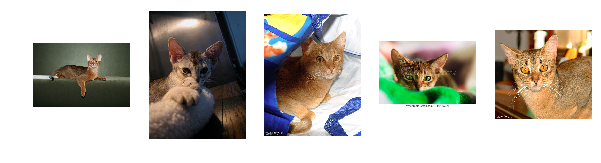

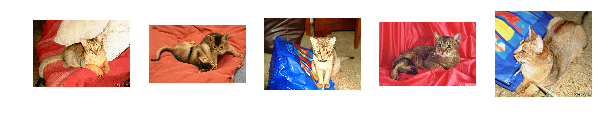

In [3]:
# Clean up in case this code block is executed more than once
images.clear()
imageFileNames.clear()

# Number of images we want to use as a test set to develop against
imagesToGet = 10

# Iterate through the cat images, read them, and store in an array
for (dirpath, dirnames, filenames) in os.walk(os.path.join(os.getcwd(), imagePath, catDir)):
    # For each pet image do the following:
    for file in filenames:
        # Store the file name
        imageFileNames.append(file)
        # Read and covert the image into a format we can process
        imageFile = os.path.join("petImages", "cats", file)
        image = cv2.imread(imageFile, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Store the image
        images.append(image)
        # Stop when we've collected the required amount of images
        if len(images) == imagesToGet:
            break
    # Stop processing, so we don't recurse further
    break

# Examine the images we've collected
grid_display(images, [], 5, (10,10))

## Convert images to squares (i.e. 1:1 aspect ratio)

It seems many of the pictures have differing aspect ratios, and so the next step should be to standardize these across the images.

(376, 374, 3)


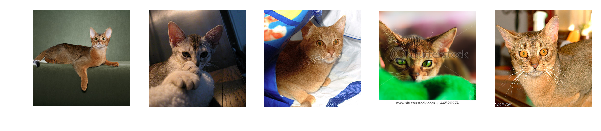

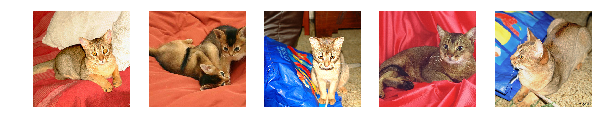

In [4]:
# Clean up in case this code block is executed more than once
croppedImages.clear()

# For each of the test images do the following:
    # Determine which side of the image is bigger than the other
    # Calculate the size difference between the sides
    # Reduce the longer side to the same dimension as the shorter side
    # while keeping the image centered
for image in images:
    if image.shape[0] > image.shape[1]:
        dimDiff = round((image.shape[0]-image.shape[1])/2, 0)
        cropRange =  range(int(dimDiff), int(image.shape[0]-dimDiff))
        image = image[cropRange, 1:image.shape[1]]
    elif image.shape[0] < image.shape[1]:
        dimDiff = round((image.shape[1]-image.shape[0])/2, 0)
        cropRange =  range(int(dimDiff), int(image.shape[1]-dimDiff))
        image = image[1:image.shape[0], cropRange]    
    
    # Save the standardized aspect ratio image
    croppedImages.append(image)

# Examine the first image as a sanity check
grid_display(croppedImages, [], 5, (10,10))

# View the images with standardized aspect ratios applied
print(croppedImages[1].shape)

## Reduce the size of the images

Next we'll reduce the size of the images.  If you adjust the value of the `newImageSize` to a smaller value such as 64 you can really see the pixelation of the images start to occur.

(128, 128, 3)


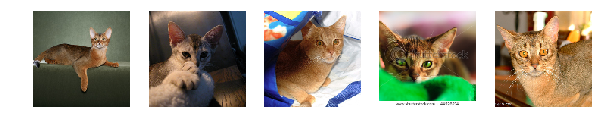

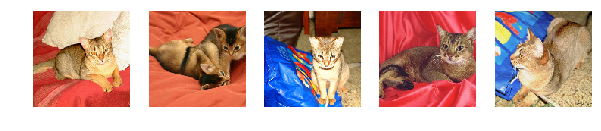

In [5]:
# Clean up in case this code block is executed more than once
processedImages.clear()

# Define the new size of the images
newImageSize = 128

# Resize and save each of the test images:
for image in croppedImages:
    image = cv2.resize(image, (newImageSize, newImageSize))
    processedImages.append(image)

# Examine the first image as a sanity check
grid_display(processedImages, [], 5, (10,10))

# View the resized images
print(processedImages[1].shape)

## Write an image to disc and compare the original image attributes with processed image attributes

In [6]:
# Write the first test image to disc
cv2.imwrite('processedImageOne.png', cv2.cvtColor(processedImages[1], cv2.COLOR_RGB2BGR))

# Init the dictionaries that will hold the image attribute data
imgOrig = {}
imgProc = {}

# Collect image attribute data for the orig. image and the processed image
imgOrig['path'] = os.path.join(os.getcwd(), imagePath, catDir, imageFileNames[1])
imgProc['path'] = os.path.join(os.getcwd(), 'processedImageOne.png')

imgOrig['size'] = round(os.path.getsize(imgOrig['path'])/1024, 1)
imgProc['size'] = round(os.path.getsize(imgProc['path'])/1024, 1)

imgOrig['pixels'] = images[1].size
imgProc['pixels'] = processedImages[1].size

imgOrig['shape'] = images[1].shape
imgProc['shape'] = processedImages[1].shape

# Output a summary of the results
print("\n")
print("Orig Image shape: " + str(imgOrig['shape']))
print("Number of pixels: " + str(imgOrig['pixels']))
print("File size (kb):" + str(imgOrig['size']))

print("\n")
print("Processed Image shape: " + str(imgProc['shape']))
print("Number of pixels: " + str(imgProc['pixels']))
print("File size (kb):" + str(imgProc['size']))

print("\n")
print("Pixel reduction: " + str(imgOrig['pixels'] - imgProc['pixels']))
print("File size reduction (kb): " + str(imgOrig['size'] - imgProc['size']))
print("\n")



Orig Image shape: (500, 375, 3)
Number of pixels: 562500
File size (kb):94.0


Processed Image shape: (128, 128, 3)
Number of pixels: 49152
File size (kb):32.9


Pixel reduction: 513348
File size reduction (kb): 61.1




## Examine a 10x10 subsection of the first two image's color channels

In [7]:
print(processedImages[1].shape)
print(processedImages[1][1:10,1:10,1])
print("\n")
print(processedImages[2].shape)
print(processedImages[2][1:10,1:10,1])

(128, 128, 3)
[[ 45  67  81  85  88  91  95 103 108]
 [ 40  65  81  90  94  98 106 112 111]
 [ 40  64  84  97 103 109 115 122 121]
 [ 38  65  89 106 109 115 124 132 134]
 [ 41  62  90 111 115 126 132 140 140]
 [ 48  60  89 116 126 134 136 147 148]
 [ 66  61  87 117 134 135 141 154 156]
 [ 80  60  86 114 135 142 151 161 166]
 [ 89  63  82 112 145 154 155 165 170]]


(128, 128, 3)
[[103 112 104 119 104  97  87 117 112]
 [ 98  97 108 104  90  81 107 114 125]
 [101  84  84  80  76  92 108 120 111]
 [ 86  74  71  80  88 107 109 103 109]
 [195 206 215 183 115 116 116 117 118]
 [207 211 217 239 247 191 107 117 119]
 [203 209 219 242 229 224 211 102 105]
 [202 217 228 223 204 176 148 148 146]
 [195 199 209 193 181 155 136 153 174]]


## Reshape/flatten and standardize the sample images

> To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

> One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you subtract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

What that in mind let's standardize the test images:

In [8]:
# Create a container for the flattened dataset
# We want one column entry for each image, and a row entry for each pixel color value
dataSet = np.zeros((np.prod(processedImages[1].shape), len(processedImages)))
print("dataSet.shape: " + str(dataSet.shape) + "\n")

# Next we flatten and standardize each image and store it in the dataSet container
for i, image in enumerate(processedImages):
    dataSet[:,i] = image.flatten()/255
     
# Pull first dataset item and examine it as a sanity check
item = dataSet[:,1]
print("First dataSet item shape: " + str(item.shape))
print("First 10 dataSet item one values:")
print(item[1:10])
print("\n")

# Pull last dataset item and examine it as a sanity check
item = dataSet[:,9]
print("Last dataSet item shape: " + str(item.shape))
print("First 10 dataSet item nine values:")
print(item[1:10])
        

dataSet.shape: (49152, 10)

First dataSet item shape: (49152,)
First 10 dataSet item one values:
[0.09411765 0.08627451 0.23529412 0.18823529 0.16078431 0.32941176
 0.26666667 0.20784314 0.36862745]


Last dataSet item shape: (49152,)
First 10 dataSet item nine values:
[0.44313725 0.72941176 0.18039216 0.43529412 0.72156863 0.18823529
 0.40392157 0.70196078 0.18039216]


## Package the data into a portable container

Next we need to package the processed data into a portable container that can be distributed and utilized by the NN we'll build in later write-ups.  We'll utilize the HDF5 binary data format which is supported by the `h5py` python package.  The website for the package can be found [here](http://www.h5py.org/).

From the `h5py` website:

> The h5py package is a Pythonic interface to the HDF5 binary data format.

> It lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays. Thousands of datasets can be stored in a single file, categorized and tagged however you want.

> H5py uses straightforward NumPy and Python metaphors, like dictionary and NumPy array syntax. For example, you can iterate over datasets in a file, or check out the .shape or .dtype attributes of datasets. You don't need to know anything special about HDF5 to get started.

> In addition to the easy-to-use high level interface, h5py rests on a object-oriented Cython wrapping of the HDF5 C API. Almost anything you can do from C in HDF5, you can do from h5py.

> Best of all, the files you create are in a widely-used standard binary format, which you can exchange with other people, including those who use programs like IDL and MATLAB.

So, let's get started!

### Create the HDF5 and write the dataset into it

In [10]:
# Import the module
import h5py

# Create the HDF5 container and add the sample data we've created
cats = h5py.File("catData.hdf5", "w")
dset = cats.create_dataset("catData", data=dataSet)
cats.close()

# Check the size on disk
sizeOnDisk = round(os.path.getsize("catData.hdf5")/1024, 1)
print( "catData.hdf5 file size (kb): " + str(sizeOnDisk))


catData.hdf5 file size (kb): 3842.0


### Validate the HDF5 container is readable and the stored dataset has been saved correctly

In [20]:
# Open and read the HDF5 container
cats = h5py.File("catData.hdf5", "r")
print("HDF5 container keys: " + str(list(cats.keys())) + "\n")

# Pull the sample data from the HDF5 container
cData = cats['catData']

# Pull first dataset item and examine it
item = cData[:,1]
print("First HDF5 container dataSet item shape: " + str(item.shape))
print("First 10 dataSet item one values:")
print(item[1:10])
print("\n")

# Close the HDF5 container
cats.close()


# Compare to the orig. data as a sanity check:
item = dataSet[:,1]
print("First dataSet item shape: " + str(item.shape))
print("First 10 dataSet item one values:")
print(item[1:10])


HDF5 container keys: ['catData']

First HDF5 container dataSet item shape: (49152,)
First 10 dataSet item one values:
[0.09411765 0.08627451 0.23529412 0.18823529 0.16078431 0.32941176
 0.26666667 0.20784314 0.36862745]


First dataSet item shape: (49152,)
First 10 dataSet item one values:
[0.09411765 0.08627451 0.23529412 0.18823529 0.16078431 0.32941176
 0.26666667 0.20784314 0.36862745]


# Summary and Next Steps

<img style="float: left; margin-right: 15px;" src="images/greenCheckmark.png">

At this point we've accomplished our three initial goals:

* Find and acquire the cat and non-cat images
* Process a small subset of images as a proof of concept for the image dataset creation process
* Output a portable binary data container containing the subset of processed images

<br/>We have a final product in the form of a HDF5 binary data file, and we can write and retrieve information to and from the data file for use in future projects.

The next steps include:

* Applying the processes developed in the prototype to the entire image dataset of cat and non-cat images
* Creating labels for the final dataset
* Partitioning the final data set into a train and test set
* Outputting the final production quality HDF5 binary data file 


# Appendix A:  Installing openCV for Image Processing

* Browse to https://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv

* Download the file that matches your python version. 
  * Example: I have python v3.6, so I downloaded the file "opencv_python-3.4.0-cp36-cp36m-win_amd64.whl"

* Install it:
```
pip install <DOWNLOAD_PATH><filename>
```
  * Example:
```
> pip install .\Downloads\opencv_python-3.4.0-cp36-cp36m-win_amd64.whl
Processing c:\users\nathan\downloads\opencv_python-3.4.0-cp36-cp36m-win_amd64.whl
Installing collected packages: opencv-python
Successfully installed opencv-python-3.4.0
```

You can find a quick tutorial and further documentation [here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html#).